In [1]:
with open("input.txt", "r", encoding="utf-8") as f: 
    text = f.read()

In [2]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [3]:
# take set of all the chars in the text 
chars = sorted(list(set(text))) 
voc_size = len(chars) 
print(''.join(chars))
print(voc_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [4]:
# mapping characters to integers and vice versa
stoi = { ch:i for i, ch in enumerate(chars) }
itos = { i:ch for i, ch in enumerate(chars) }

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

In [5]:
print(encode("hello world"))
print(decode(encode("hello world")))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [6]:
# encode the number representation from encoding to tensor
import torch 

data = torch.tensor(encode(text), dtype=torch.long) 
print(data.shape, data.dtype)
print(data[:1000])

c:\Users\HP\dev\gpt\.venv\Lib\site-packages\torch\_subclasses\functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [7]:
# split up dataset into train and validation
n = int(0.9*len(data))
train_data = data[:n] 
val_data = data[n:]

In [8]:
# set chunk size a.k.a blocksize 
block_size = 8 
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [9]:
# simulate how the completion (generation) will look like in batch training 
x = train_data[:block_size] 
y = train_data[1:block_size+1] 
for t in range(block_size): 
    context = x[:t+1] 
    target = y[t] 
    print(f"When the input is {context} the target: {target}")

When the input is tensor([18]) the target: 47
When the input is tensor([18, 47]) the target: 56
When the input is tensor([18, 47, 56]) the target: 57
When the input is tensor([18, 47, 56, 57]) the target: 58
When the input is tensor([18, 47, 56, 57, 58]) the target: 1
When the input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
When the input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
When the input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [10]:
# samples
torch.randint(3, 10, (3,)) # low, high, (dimension)

tensor([5, 4, 5])

In [11]:
torch.randint(len(data) - block_size, (4, ))

tensor([447571, 701585, 118646, 456714])

In [12]:
torch.stack([data[i:block_size+i] for i in range(2)])

tensor([[18, 47, 56, 57, 58,  1, 15, 47],
        [47, 56, 57, 58,  1, 15, 47, 58]])

In [13]:
torch.manual_seed(1337) 
batch_size = 4 # how many independent sequences will we process in parallel 
block_size = 8 # what is the maximum context length for predictions 
 
def get_batch(split): 
    # generate a small batch of data of inputs x and targets y 
    data = train_data if split == 'train' else val_data 
    ix = torch.randint(len(data) - block_size, (batch_size, )) # random numbers in batch_size 
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y 

xb, yb = get_batch('train') 
print("inputs:") 
print(xb.shape) 
print(xb) 
print('targets:')
print(yb.shape) 
print(yb)
    

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])


In [14]:
for b in range(batch_size): 
    for t in range(block_size): 
        context = xb[b, :t+1] 
        target = yb[b, t] 
        print(f"when input is {context.tolist()} the target: {target}")

when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53, 56, 1, 58, 46] the target: 39
when input is [44, 53, 56, 1, 58, 46, 39] the target: 58
when input is [44, 53, 56, 1, 58, 46, 39, 58] the target: 1
when input is [52] the target: 58
when input is [52, 58] the target: 1
when input is [52, 58, 1] the target: 58
when input is [52, 58, 1, 58] the target: 46
when input is [52, 58, 1, 58, 46] the target: 39
when input is [52, 58, 1, 58, 46, 39] the t

In [15]:
embedding_layer = torch.nn.Embedding(65, 65)

pred_log = embedding_layer(xb)
print(f"original tensor shape: {xb.shape}")
print(f"logits shape (output): {pred_log.shape}")

original tensor shape: torch.Size([4, 8])
logits shape (output): torch.Size([4, 8, 65])


In [16]:
pred_log.view(4*8, 65).shape

torch.Size([32, 65])

In [17]:
pred_log[:, -1, :].shape

torch.Size([4, 65])

In [18]:
import torch.nn as nn 
from torch.nn import functional as F 
torch.manual_seed(1337) 

class BigramLanguageModel(nn.Module): 
    def __init__(self, vocab_size): 
        super().__init__() 
        # taking a tensor input (word ids, tokenized) into vector representations 
        # num_embeddings means how large is your vocabulary (in this case 65 unique symbols) 
        # embedding_dim means how long is the vector representation for each symbols (each symbol will be represented in 65 dimension vector)
        self.token_embedding_table = nn.Embedding(num_embeddings=vocab_size, embedding_dim=vocab_size) 

    def forward(self, input_tensors, target_tensors=None): 
        # forward pass without activation function
        logits = self.token_embedding_table(input_tensors) # (B,T,C)
        if target_tensors is None: 
            loss = None 
        else: 
            B, T, C = logits.shape 
            logits = logits.view(B*T, C) 
            target_tensors = target_tensors.view(B*T)
            loss = F.cross_entropy(logits, target_tensors)

        return logits, loss

    def generate(self, input_tensors, max_new_tokens): 
        for _ in range(max_new_tokens): 
            # get the predictions 
            logits, loss = self(input_tensors) 
            # focus only on the last time step 
            logits = logits[:, -1, :] # becomes (B, C) <=> batch and the logits for each sequence 
            # apply softmax to get probabilities 
            probs = F.softmax(logits, dim=-1)  # (B, C) 
            # sample from the distribution 
            next_tensor = torch.multinomial(probs, num_samples=1) # (B, 1) 
            # append sampled index to the running sequence 
            input_tensors = torch.cat((input_tensors, next_tensor), dim=1) # (B, T+1)
        return input_tensors
    
m = BigramLanguageModel(voc_size)
logits, loss = m(xb, yb) 
print(logits.shape)
print(loss)

print(decode(m.generate(input_tensors=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [19]:
m.parameters

<bound method Module.parameters of BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)>

In [20]:
# create a pytorch optimizer (optimizing parameters)
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [21]:
batch_size = 32 
for steps in range(10000): 
    # sample batch  
    xb, yb = get_batch('train') 

    # evaluate the loss 
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step() 

    print(loss.item())

4.692410945892334
4.664144515991211
4.7657151222229
4.70655632019043
4.5956573486328125
4.7101240158081055
4.713661193847656
4.686909198760986
4.700076103210449
4.7182841300964355
4.715603351593018
4.684308052062988
4.745601177215576
4.735717296600342
4.666238784790039
4.58615255355835
4.714625835418701
4.671982765197754
4.715047359466553
4.74489164352417
4.630162715911865
4.707578182220459
4.670665264129639
4.582583427429199
4.739546298980713
4.674807071685791
4.805595874786377
4.749917507171631
4.691989421844482
4.604404926300049
4.721841335296631
4.741591930389404
4.6099629402160645
4.662769794464111
4.730099678039551
4.738433361053467
4.688235282897949
4.639987945556641
4.736632823944092
4.709773540496826
4.736939430236816
4.69184684753418
4.719646453857422
4.752516746520996
4.570086479187012
4.643786907196045
4.699163913726807
4.806960105895996
4.572142601013184
4.717066287994385
4.509502410888672
4.603540897369385
4.6649675369262695
4.712099075317383
4.736576557159424
4.812878131

In [22]:
print(decode(m.generate(input_tensors=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


lso br. ave aviasurf my, yxMPZI ivee iuedrd whar ksth y h bora s be hese, woweee; the! KI 'de, ulseecherd d o blllando;LUCEO, oraingofof win!
RIfans picspeserer hee tha,
TOFonk? me ain ckntoty ded. bo'llll st ta d:
ELIS me hurf lal y, ma dus pe athouo
BEY:! Indy; by s afreanoo adicererupa anse tecorro llaus a!
OLeneerithesinthengove fal amas trr
TI ar I t, mes, n IUSt my w, fredeeyove
THek' merer, dd
We ntem lud engitheso; cer ize helorowaginte the?
Thak orblyoruldvicee chot, p,
Bealivolde Th li


## self-attention

In [23]:
torch.manual_seed(1337) 
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [24]:
# we want to get the mean "average" of the previous tokens (weakest form of aggregation)
xbow = torch.zeros((B,T,C)) # back of words 
for b in range(B): 
    for t in range(T): 
        xprev = x[b, :t+1] # (t, C)
        xbow[b, t] = torch.mean(xprev, 0) # averaging the t


In [25]:
wg = torch.tril(torch.ones(T, T))
wg = wg / wg.sum(1, keepdim=True)
xbow2 = wg @ x # (B, T, T) @ (B, T, C) => (B, T, C)

In [26]:
# version 3: use softmax 
tril = torch.tril(torch.ones(T, T)) 
wg = torch.zeros((T, T))
wg = wg.masked_fill(tril==0, float('-inf'))
wg = F.softmax(wg, dim=-1)
xbow3 = wg @ x

In [32]:
tr = torch.tril(torch.ones(T, T))

In [36]:
wg = torch.zeros((T, T))
wg = wg.masked_fill(tril==0, float('-inf'))
wg = F.softmax(wg, dim=-1)
wg

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [68]:
# version 4: self-attention 
torch.manual_seed(1337)
B,T,C = 4, 8, 32 # batch, time, channels 
x = torch.randn(B,T,C) 

# a single head perform self-attention 
head_size = 16 
key = nn.Linear(C, head_size, bias=False) # key vector (what the token have)
query = nn.Linear(C, head_size, bias=False) # query vector (what the token needs)
value = nn.Linear(C, head_size, bias=False)
k = key(x) # (B,T,16)
q = query(x) # (B,T,16)
wei = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril==0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v

out.shape

torch.Size([4, 8, 16])

- Attention is a communication mechanism can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependendent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens. 
- Each example across batch dimension is of course processed completely independently and never "talk" to each other. 
- In an "encoder" attention block just delete the single line that does masking with tril, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modelling. 
- Self-attention just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source. 
- Scaled attention additional divides wei by 1/sqrt(head_size). This makes it so when input Q, K are unit variance, wei will be unit variance too and softmax will stay diffuse and not saturate too much.

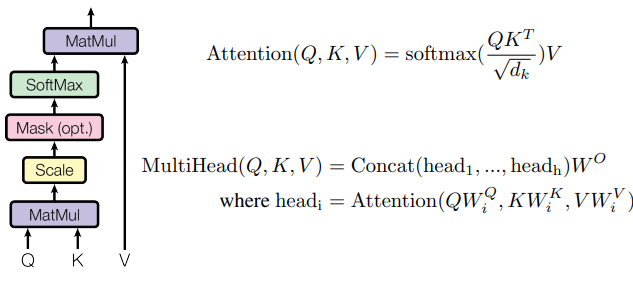

In [69]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [70]:
k.var()

tensor(1.0449)

In [73]:
torch.cuda.is_available()

False